# ASSOCIATION RULES

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

**Read the Excel file**

In [ ]:
df = pd.read_excel('/Users/prasadbodduboina/Downloads/DS/Association Rules/Online retail.xlsx', header=None)

**Split the single row into multiple columns**

In [7]:
records = df[0].str.split(',', expand=True).values.tolist()

In [8]:
records

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 ['chutney',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 ['turkey',
  'avocado',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  

In [9]:
# Check for None values and clean the records
# Flatten the records to check for None values
flattened_records = [item for sublist in records for item in sublist]

In [10]:

# Identify and print the None values
none_values = [item for item in flattened_records if item is None]
if none_values:
    print(f"Found None values: {none_values}")

Found None values: [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, No

In [11]:
# Remove None values from the records
records = [[item for item in transaction if item is not None] for transaction in records]

In [12]:
# Ensure that records are not empty
records = [transaction for transaction in records if transaction]  # Remove empty transactions


**Transaction encoding**

In [14]:
encoder = TransactionEncoder()
onehot = encoder.fit(records).transform(records)
df_encoded = pd.DataFrame(onehot, columns=encoder.columns_)

In [15]:
df_encoded

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Generate frequent itemsets with a threshold for support

In [18]:
min_support = 0.01  # Adjust as needed
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

In [19]:
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, ground beef, milk)"
253,0.017064,"(mineral water, spaghetti, ground beef)"
254,0.015731,"(mineral water, spaghetti, milk)"
255,0.010265,"(mineral water, spaghetti, olive oil)"


# Generate association rules with thresholds for confidence and lift


In [22]:
min_confidence = 0.5  # Adjust as needed
min_lift = 1.5        # Adjust as needed

association_results = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift)
association_results = association_results[association_results['confidence'] >= min_confidence]

In [23]:
association_results

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
155,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
186,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969


In [24]:
# Display association rules
for index, row in association_results.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    antecedents_list = [x for x in antecedents]
    consequents_list = [x for x in consequents]

    # Display the rule
    if len(antecedents_list) == 0:
        print('Rule: No antecedents + -> ' + ', '.join(consequents_list))
    elif len(antecedents_list) == 1:
        print('Rule: ' + antecedents_list[0] + ' + -> ' + ', '.join(consequents_list))
    else:
        print('Rule: ' + ', '.join(antecedents_list) + ' + -> ' + ', '.join(consequents_list))
    # Print support, confidence, and lift
    print('Support: ' + str(row['support']))
    print("Confidence: " + str(row['confidence']))
    print('Lift: ' + str(row['lift']))
    print()  # For better readability

Rule: ground beef, eggs + -> mineral water
Support: 0.010131982402346354
Confidence: 0.5066666666666667
Lift: 2.125563012677107

Rule: ground beef, milk + -> mineral water
Support: 0.011065191307825623
Confidence: 0.503030303030303
Lift: 2.1103077757440176



**Analyse the generated rules to identify interesting patterns and relationships between the products.**

In [29]:
# Sort the association rules by lift in descending order
association_results_sorted = association_results.sort_values('lift', ascending=False)

# Analyze the top rules with high lift and confidence
print("Top Association Rules:")
for index, row in association_results_sorted.head(10).iterrows():  # Display top 10 rules
    antecedents = row['antecedents']
    consequents = row['consequents']
    antecedents_list = [x for x in antecedents]
    consequents_list = [x for x in consequents]

    print('Rule: ' + ', '.join(antecedents_list) + ' -> ' + ', '.join(consequents_list))
    print('Support: ' + str(row['support']))
    print("Confidence: " + str(row['confidence']))
    print('Lift: ' + str(row['lift']))
    print()

# Identify frequently bought together items
print("\nFrequent Itemsets:")
for index, row in frequent_itemsets.sort_values('support', ascending=False).head(10).iterrows():
  print(f"{row['itemsets']} - Support: {row['support']}")

Top Association Rules:
Rule: ground beef, eggs -> mineral water
Support: 0.010131982402346354
Confidence: 0.5066666666666667
Lift: 2.125563012677107

Rule: ground beef, milk -> mineral water
Support: 0.011065191307825623
Confidence: 0.503030303030303
Lift: 2.1103077757440176


Frequent Itemsets:
frozenset({'mineral water'}) - Support: 0.23836821757099053
frozenset({'eggs'}) - Support: 0.17970937208372217
frozenset({'spaghetti'}) - Support: 0.17411011865084655
frozenset({'french fries'}) - Support: 0.1709105452606319
frozenset({'chocolate'}) - Support: 0.1638448206905746
frozenset({'green tea'}) - Support: 0.13211571790427942
frozenset({'milk'}) - Support: 0.12958272230369283
frozenset({'ground beef'}) - Support: 0.09825356619117451
frozenset({'frozen vegetables'}) - Support: 0.09532062391681109
frozenset({'pancakes'}) - Support: 0.09505399280095987


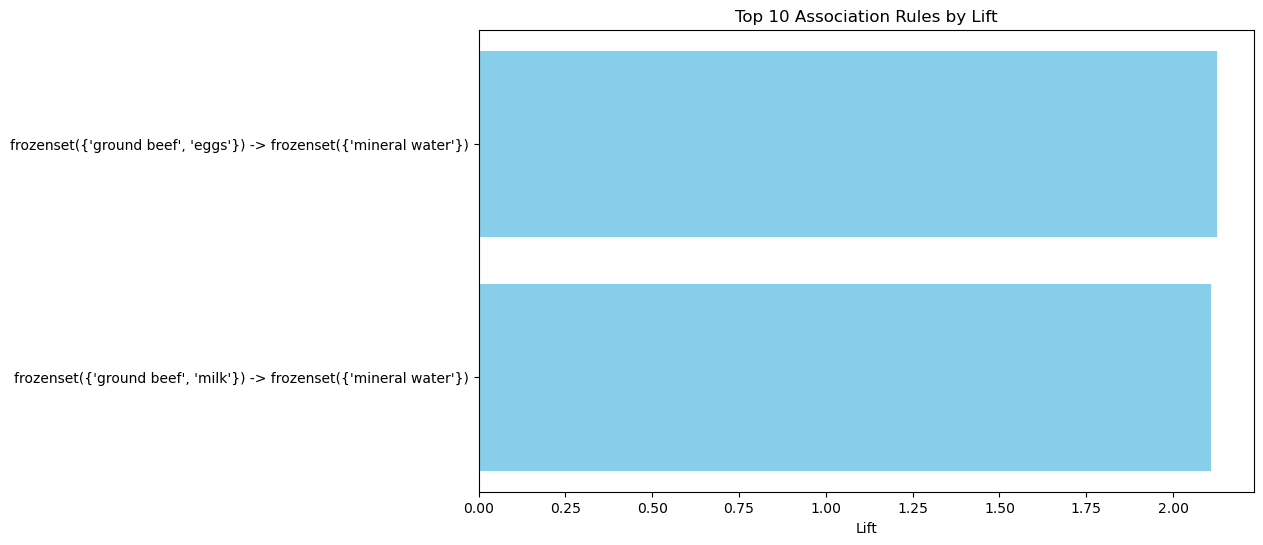

In [75]:
# Assuming association_results_sorted is already defined
top_rules = association_results_sorted.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_rules['antecedents'].astype(str) + ' -> ' + top_rules['consequents'].astype(str), 
         top_rules['lift'], color='skyblue')
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()

In [79]:
# Assuming frequent_itemsets is already defined
top_itemsets = frequent_itemsets.sort_values('support', ascending=False).head(10)

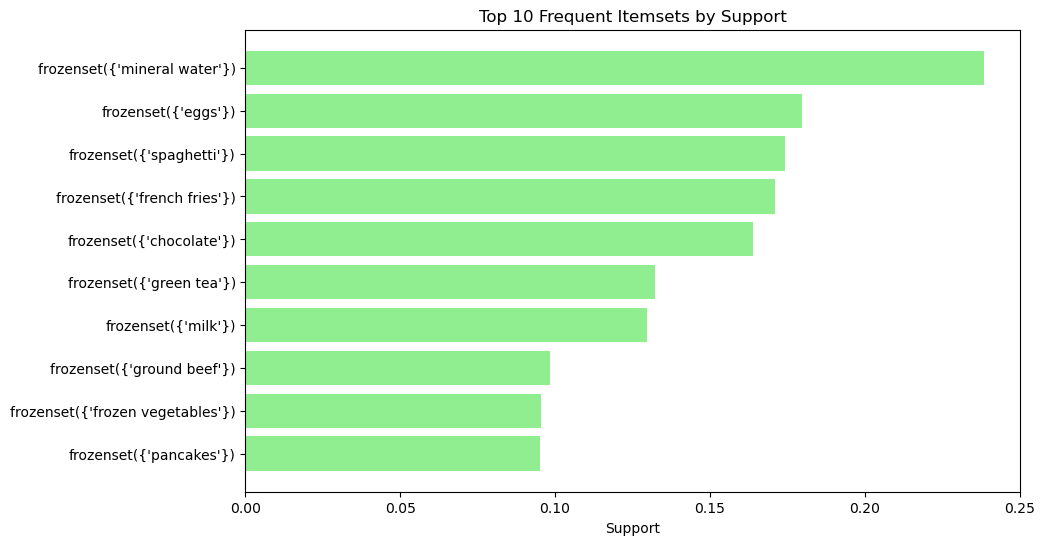

In [81]:
plt.figure(figsize=(10, 6))
plt.barh(top_itemsets['itemsets'].astype(str), top_itemsets['support'], color='lightgreen')
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets by Support')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()

### Analysis of Association Rules for 'Olive Oil' in Retail Transactions

In [33]:
all_items = [item for sublist in records for item in sublist]
if "olive oil" in all_items:
    print("'olive oil' is present in the dataset.")
else:
    print("'olive oil' is not found in the dataset.")

# Count occurrences of 'olive oil'
olive_oil_count = all_items.count("olive oil")
print(f"'olive oil' appears {olive_oil_count} times in the dataset.")

# Print total number of transactions
print(f"Total number of transactions: {len(records)}")

# Adjust support and confidence thresholds if necessary
min_support = 0.005  # Lowered support threshold
min_confidence = 0.4  # Adjust as needed
min_lift = 1.5

# Regenerate association results
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
association_results = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift)
association_results = association_results[association_results['confidence'] >= min_confidence]

# Find rules with 'olive oil'
rules_with_product = association_results[
    association_results['antecedents'].apply(lambda x: "olive oil" in x) |
    association_results['consequents'].apply(lambda x: "olive oil" in x)
]

# Display the results
print(f"\nAssociation Rules related to 'olive oil':")
if not rules_with_product.empty:
    for index, row in rules_with_product.iterrows():
        antecedents = row['antecedents']
        consequents = row['consequents']
        antecedents_list = [x for x in antecedents]
        consequents_list = [x for x in consequents]

        print('Rule: ' + ', '.join(antecedents_list) + ' -> ' + ', '.join(consequents_list))
        print('Support: ' + str(row['support']))
        print("Confidence: " + str(row['confidence']))
        print('Lift: ' + str(row['lift']))
        print()  # For better readability
else:
    print(f"No association rules found for 'olive oil' with the current thresholds.")


'olive oil' is present in the dataset.
'olive oil' appears 494 times in the dataset.
Total number of transactions: 7501

Association Rules related to 'olive oil':
Rule: olive oil -> mineral water
Support: 0.027596320490601255
Confidence: 0.4190283400809717
Lift: 1.7579035676439423

Rule: chocolate, olive oil -> mineral water
Support: 0.008265564591387815
Confidence: 0.5040650406504065
Lift: 2.1146486968225386

Rule: olive oil, chocolate -> spaghetti
Support: 0.007065724570057326
Confidence: 0.43089430894308944
Lift: 2.4748378341363813

Rule: olive oil, eggs -> mineral water
Support: 0.005865884548726837
Confidence: 0.48888888888888893
Lift: 2.050981854337559

Rule: olive oil, eggs -> spaghetti
Support: 0.005065991201173177
Confidence: 0.4222222222222222
Lift: 2.4250297770971585

Rule: frozen vegetables, olive oil -> mineral water
Support: 0.006532462338354886
Confidence: 0.5764705882352941
Lift: 2.4184037373338594

Rule: frozen vegetables, olive oil -> spaghetti
Support: 0.005732568990

**Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.**


In [36]:
# Analyze the top rules with high lift and confidence
print("Top Association Rules:")
for index, row in association_results_sorted.head(10).iterrows():  # Display top 10 rules
    antecedents = row['antecedents']
    consequents = row['consequents']
    antecedents_list = [x for x in antecedents]
    consequents_list = [x for x in consequents]

    print('Rule: ' + ', '.join(antecedents_list) + ' -> ' + ', '.join(consequents_list))
    print('Support: ' + str(row['support']))
    print("Confidence: " + str(row['confidence']))
    print('Lift: ' + str(row['lift']))
    print()

Top Association Rules:
Rule: ground beef, eggs -> mineral water
Support: 0.010131982402346354
Confidence: 0.5066666666666667
Lift: 2.125563012677107

Rule: ground beef, milk -> mineral water
Support: 0.011065191307825623
Confidence: 0.503030303030303
Lift: 2.1103077757440176



### Insights into Customer Purchasing Behaviour:
 - Customers tend to buy certain items together, suggesting potential product bundling or cross-selling opportunities.
 - For instance, if items X and Y frequently appear together in transactions, we can promote them together to increase sales.
 - Rules with high lift and confidence indicate a strong association between items.
 - For example, a rule with high lift and confidence might reveal that customers who buy product A are very likely to buy product B as well.
 - This can help us understand the relationships between different products and create targeted marketing campaigns.
 - Examining the presence of specific items like 'olive oil' within the dataset allows us to analyze their buying patterns.
 - If 'olive oil' is frequently purchased with other products, it suggests that they might be complementary goods.
 - 
 **- For example**, if 'olive oil' is often bought with 'bread', we can place them closer together in stores or promote them as a package deal.
 - Support indicates how frequently the itemset appears in the dataset.
 - Confidence measures the likelihood of the consequent given the antecedent.
 - Lift reveals how much more likely the consequent is to be purchased when the antecedent is also purchased.
 - By analyzing these metrics, we gain a deeper understanding of customer purchasing behavior.

**Further Analysis:**
 - Analyze customer demographics and preferences to understand their impact on purchasing behavior.
 - Examine seasonal trends and promotions to identify patterns and develop targeted marketing campaigns.
 - Explore basket analysis with customer segmentation to understand the preferences of different customer groups.

In [53]:
# Print a summary of the generated rules
print(association_results[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

                antecedents      consequents   support  confidence      lift
143  (extra dark chocolate)  (mineral water)  0.005733    0.477778  2.004369
229           (ground beef)  (mineral water)  0.040928    0.416554  1.747522
267           (light cream)  (mineral water)  0.007332    0.470085  1.972098
297           (nonfat milk)  (mineral water)  0.005066    0.487179  2.043811
299             (olive oil)  (mineral water)  0.027596    0.419028  1.757904


In [55]:
# High Lift Rules
high_lift_rules = association_results[association_results['lift'] > 3]
print("High Lift Rules:")
print(high_lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

High Lift Rules:
                antecedents  consequents   support  confidence      lift
1039  (shrimp, ground beef)  (spaghetti)  0.005999    0.523256  3.005315


C:\Users\naveenvarma\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\naveenvarma\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\naveenvarma\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


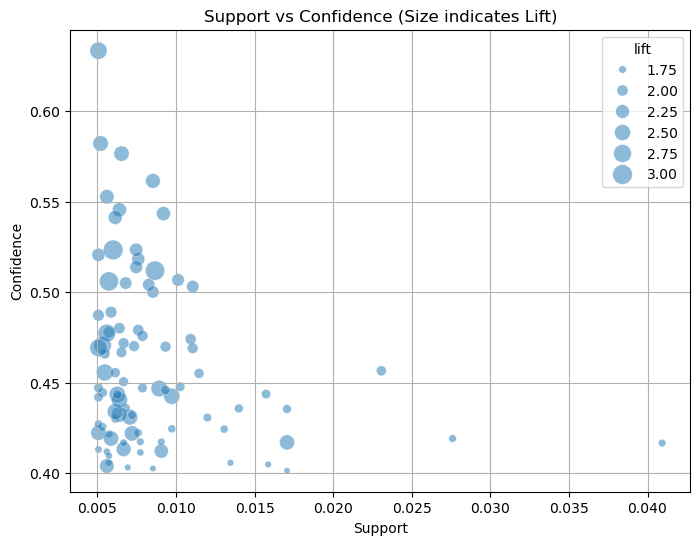

In [56]:
# Visualize Support vs Confidence
plt.figure(figsize=(8, 6))
sns.scatterplot(data=association_results, x='support', y='confidence', size='lift', sizes=(20, 200), alpha=0.5)
plt.title('Support vs Confidence (Size indicates Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid()
plt.show()

In [60]:
from collections import Counter

In [61]:
# Count items in antecedents and consequents
antecedent_items = Counter()
for antecedents in association_results['antecedents']:
    antecedent_items.update(antecedents)

consequent_items = Counter()
for consequents in association_results['consequents']:
    consequent_items.update(consequents)

# Display the most common items
print("Most Common Antecedent Items:")
print(antecedent_items.most_common(10))

print("Most Common Consequent Items:")
print(consequent_items.most_common(10))

Most Common Antecedent Items:
[('ground beef', 26), ('milk', 18), ('olive oil', 14), ('chocolate', 14), ('spaghetti', 14), ('frozen vegetables', 12), ('eggs', 10), ('tomatoes', 8), ('soup', 7), ('pancakes', 7)]
Most Common Consequent Items:
[('mineral water', 69), ('spaghetti', 20), ('eggs', 1)]


# Visualize relationships using a network graph

In [65]:
import networkx as nx

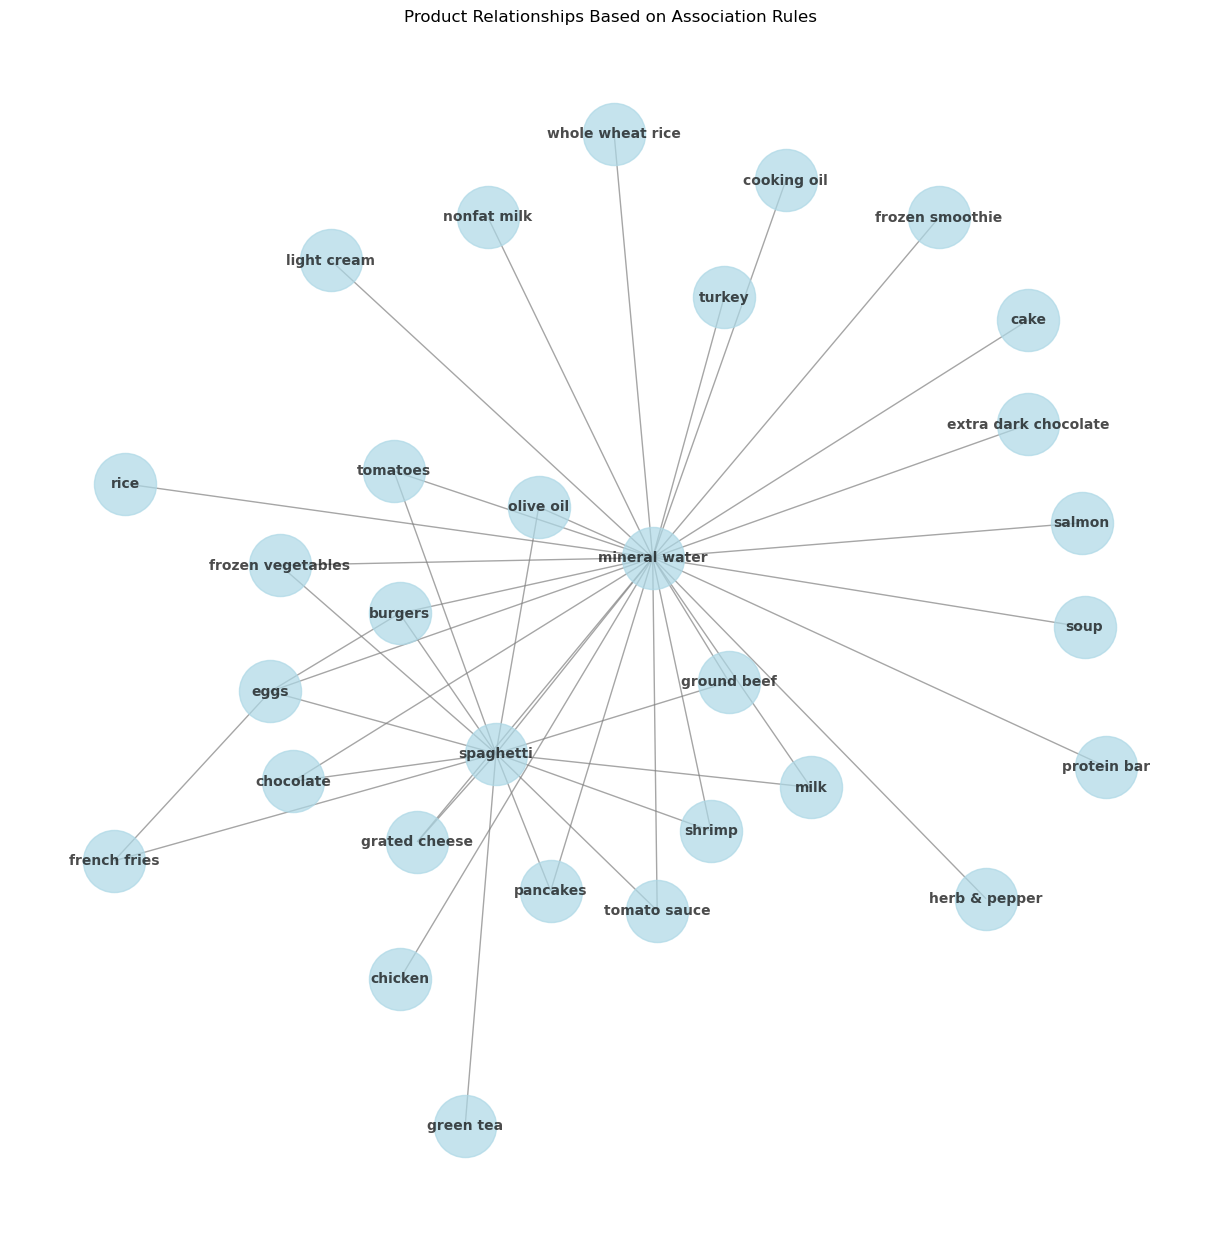

In [67]:
G = nx.Graph()
for index, row in association_results.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', alpha=0.7)
plt.title('Product Relationships Based on Association Rules')
plt.show()

# Interview Questions:

### 1.	What is lift and why is it important in Association rules?

### Lift in Association Rules

**Lift is a measure that indicates how much more likely the consequent is to be purchased when the antecedent is also purchased, compared to when the consequent is purchased independently.**

### Importance of Lift:

### 1. Strength of Association:
**- Lift > 1 indicates a positive correlation between the antecedent and consequent.**

**- Lift = 1 indicates that the antecedent and consequent are independent of each other.**

**- Lift < 1 indicates a negative correlation (less likely to purchase consequent if antecedent is purchased).**

### 2. Identifying Interesting Relationships:
**- High lift values suggest that the association rule is not just due to chance and represents a genuinely interesting relationship between items.**

### 3. Decision-Making for Business:
**- High lift rules are helpful for identifying potential product bundling opportunities, cross-selling strategies,or product placement strategies. For example, if two products have a high lift, placing them near each other might increase sales.**

# 2.	What is support and Confidence. How do you calculate them?

### Support
**Support is the proportion of transactions in the dataset that contain a specific itemset (either a single item or a set of items). It measures how frequently an itemset appears in the dataset.**

### Calculation:
**Support(Itemset) =** (Number of transactions containing Itemset) / (Total number of transactions)

### Example:
**If we have 100 transactions and 20 of them contain the itemset {Milk, Bread}, then the support for {Milk, Bread} is 20/100 = 0.2.**


### Confidence
**Confidence is a measure of how often the consequent of a rule is purchased when the antecedent is also purchased.**

**It shows the conditional probability of the consequent given the antecedent.**

### Calculation:
**Confidence(Antecedent => Consequent) = Support(Antecedent ∪ Consequent) / Support(Antecedent)**

### Example:
**If the support for {Milk} is 0.6 and the support for {Milk, Bread} is 0.2, then the confidence for the rule {Milk} => {Bread} is 0.2 / 0.6 = 0.33.**


**In our previous example, we calculated support and confidence with the following code:**

**for index, row in rules_sorted.head(10).iterrows():**
**antecedents = list(row['antecedents'])**

**consequents = list(row['consequents'])**

**support = row['support']**

**confidence = row['confidence']**

**lift = row['lift']**

**print(f"Rule: {antecedents} => {consequents}")**

**print(f"Support: {support:.3f}, Confidence: {confidence:.3f}, Lift: {lift:.3f}")**

### In summary:
**Support measures the frequency of an itemset in the dataset.**

**Confidence measures the reliability or strength of a rule.**

# 3.	What are some limitations or challenges of Association rules mining?

### Limitations and Challenges of Association Rule Mining

### 1. Sparsity of Data:
**- In many real-world datasets, the number of transactions is large, but the number of items in each transaction is relatively small.**
**- This leads to sparse data, where many item combinations are not frequently purchased together, making it difficult to find meaningful association rules.**


### 2. Scalability:
**- As the size of the dataset grows, the computation required to find frequent itemsets and association rules can become computationally expensive.**
**- This can be a challenge for large datasets with millions or billions of transactions.**


### 3. Data Preprocessing:
**- Association rule mining often requires extensive data preprocessing steps, such as handling missing values, cleaning the data, and transforming it into a suitable format.**
**- This can be a time-consuming and challenging process, and errors in preprocessing can significantly impact the quality of the discovered rules.**


### 4. Interpretation of Rules:
**- The sheer number of rules generated can make it difficult to interpret and understand the underlying relationships between items.**
**- It is crucial to have domain knowledge and expertise to filter and interpret the rules effectively and identify those that are truly valuable.**


### 5. Handling Noisy Data:
**- Association rule mining algorithms can be sensitive to noisy data or outliers, which can lead to the discovery of spurious or irrelevant rules.**
**- Data cleaning and outlier detection are important steps in pre-processing to minimize the impact of noise on the results.**


### 6. Selection of Parameters:
**- The performance of association rule mining algorithms is highly dependent on the chosen parameters, such as the minimum support, confidence, and lift thresholds.**
**- Selecting appropriate values for these parameters can be challenging and requires careful consideration of the specific dataset and application.**


### 7. Contextual Information:
**- Association rule mining often ignores contextual information, such as the time of purchase, location, customer demographics, or product category.**
**- This can lead to the discovery of rules that are not truly relevant or actionable in a specific context.**



### 8. Correlation vs. Causation:
**- It is important to note that association rules only identify correlations between items, not necessarily causal relationships.**
**- Just because two items are frequently purchased together does not necessarily mean that one causes the purchase of the other.**


### 9. Interpretability of Rules with Many Items:
**- When rules involve a large number of items, it can be difficult to interpret and understand the relationships between them.**


### Addressing the Challenges:

**- Dimensionality reduction techniques can be used to reduce the sparsity of the data.**
**- More efficient algorithms can be used to speed up the computation for large datasets.**
**- Robust data preprocessing techniques can help to handle missing values and noise.**
**- Domain knowledge and expert analysis can help to filter and interpret the rules effectively.****
**- Advanced techniques, such as incorporating contextual information, can be used to improve the relevance of the discovered rules.**
**- Careful selection of parameters is crucial to obtain meaningful and useful rules.**